In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
plt.rcParams.update({'font.size': 15})

In [ ]:
from neuron import h

In [9]:
EE = np.random.randn(408321) * 0.01 - 0.02
EI = np.random.randn(816642) * 0.05 + 0.2
II = np.random.randn(408321) * 0.05 + 0.17

In [14]:
II_t, _ = stats.yeojohnson(II)
EI_t, _ = stats.yeojohnson(EI)
EE_t, _ = stats.yeojohnson(EE)

In [21]:
with open('/home/mjy/project/bilinear_network/data/kappa_EI.p', 'wb') as f:
    pickle.dump(EI_t, f)
with open('/home/mjy/project/bilinear_network/data/kappa_EE.p', 'wb') as f:
    pickle.dump(EE_t, f)
with open('/home/mjy/project/bilinear_network/data/kappa_II.p', 'wb') as f:
    pickle.dump(II_t, f)

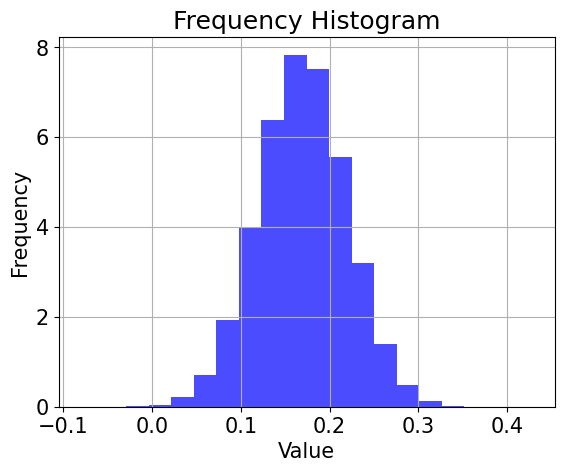

In [18]:
plt.hist(II_t, bins=20, density=True, alpha=0.7, color='blue')  # 设置bins为直方图的柱子数量
plt.title('Frequency Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
aEE = np.zeros_like(EE)
aEE[:int(len(EE)*0.11)] = EE[:int(len(EE)*0.11)] + EE[:int(len(EE)*0.11)] * np.random.randn(int(len(EE)*0.11)) * 0.10
aEE[int(len(EE)*0.11):int(len(EE)*0.22)] = EE[int(len(EE)*0.11):int(len(EE)*0.22)] + EE[int(len(EE)*0.11):int(len(EE)*0.22)] * np.random.randn(int(len(EE)*0.11)) * 0.05
aEE[int(len(EE)*0.22):int(len(EE)*0.55)] = EE[int(len(EE)*0.22):int(len(EE)*0.55)] + EE[int(len(EE)*0.22):int(len(EE)*0.55)] * np.random.randn(int(len(EE)*0.33)) * 0.03
aEE[int(len(EE)*0.55):] = EE[int(len(EE)*0.55):] + EE[int(len(EE)*0.55):] * np.random.randn(int(len(EE)*0.45)) * 0.02

aEI = np.zeros_like(EI)
aEI[:int(len(EI)*0.11)] = EI[:int(len(EI)*0.11)] + EI[:int(len(EI)*0.11)] * np.random.randn(int(len(EI)*0.11)) * 0.11
aEI[int(len(EI)*0.11):int(len(EI)*0.22)] = EI[int(len(EI)*0.11):int(len(EI)*0.22)] + EI[int(len(EI)*0.11):int(len(EI)*0.22)] * np.random.randn(int(len(EI)*0.11)) * 0.06
aEI[int(len(EI)*0.22):int(len(EI)*0.55)] = EI[int(len(EI)*0.22):int(len(EI)*0.55)] + EI[int(len(EI)*0.22):int(len(EI)*0.55)] * np.random.randn(int(len(EI)*0.33)) * 0.04
aEI[int(len(EI)*0.55):] = EI[int(len(EI)*0.55):] + EI[int(len(EI)*0.55):] * np.random.randn(int(len(EI)*0.45)) * 0.03

aII = np.zeros_like(II)
aII[:int(len(II)*0.11)] = II[:int(len(II)*0.11)] + II[:int(len(II)*0.11)] * np.random.randn(int(len(II)*0.11)) * 0.10
aII[int(len(II)*0.11):int(len(II)*0.22)] = II[int(len(II)*0.11):int(len(II)*0.22)] + II[int(len(II)*0.11):int(len(II)*0.22)] * np.random.randn(int(len(II)*0.11)) * 0.05
aII[int(len(II)*0.22):int(len(II)*0.55)] = II[int(len(II)*0.22):int(len(II)*0.55)] + II[int(len(II)*0.22):int(len(II)*0.55)] * np.random.randn(int(len(II)*0.33)) * 0.03
aII[int(len(II)*0.55):]= II[int(len(II)*0.55):] + II[int(len(II)*0.55):] * np.random.randn(int(len(II)*0.45)) * 0.02

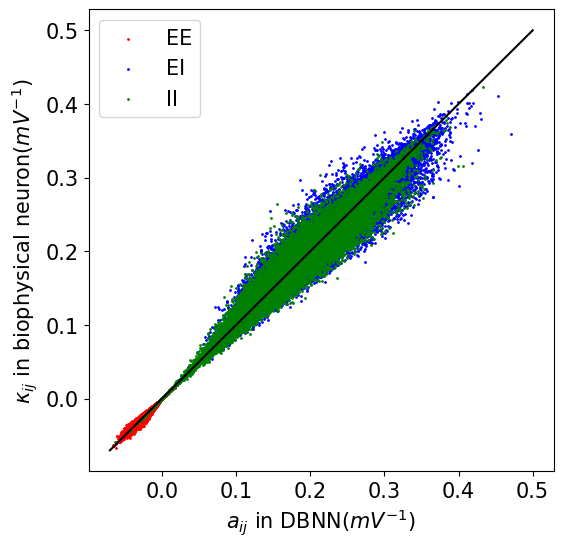

In [11]:
x = np.linspace(-0.07, 0.5, 100)
plt.figure(figsize=(6, 6))
plt.scatter(aEE, EE, color='r', alpha=1, s=1, label='EE')
plt.scatter(aEI, EI, color='blue', alpha=1, s=1, label='EI')
plt.scatter(aII, II, color='green', alpha=1, s=1, label='II')
plt.plot(x, x, color='black')
plt.legend()
plt.xlabel('$a_{ij}$ in DBNN($mV^{-1}$)')
plt.ylabel('$\kappa_{ij}$ in biophysical neuron($mV^{-1}$)')
plt.savefig('figure/kappa_scatter_plot3.png', bbox_inches='tight', dpi=800)